# Sketch to Color Using Conditional GAN.

In [1]:
# importing library
import os
import matplotlib.pyplot as plt
import PIL
import numpy as np

import tensorflow.keras.backend as K
import tensorflow as tf

from tensorflow.keras.models import load_model
from PIL import ImageFile,Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
import glob

C:\Users\ravir\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ravir\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ravir\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ravir\Anaconda3\envs\tensorflow\lib\site-packages

In [2]:
def plot_img(sketch_img,fake_img,img_name):
    '''
    Helper function for function_1
    
    This function plot the sketch and fake color image and save the plot
    '''
 
    # Rescaling images to [0 - 1]
    sketch_img = 0.5 * sketch_img + 0.5
    fake_img = 0.5 * fake_img + 0.5
    
    fig, axs = plt.subplots(sketch_img.shape[0], 2, figsize=(.8 * sketch_img.shape[0],5 * sketch_img.shape[0]))
    axs = axs.flatten()
    cnt = 0
    for sketch, fake in zip(sketch_img, fake_img):
        axs[cnt].imshow(sketch)
        axs[cnt].set_title('sketch')
        axs[cnt].axis('off')
        
        axs[cnt+1].imshow(fake)
        axs[cnt+1].set_title('fake_generated')
        axs[cnt+1].axis('off')
        cnt += 2
    fig.savefig("fun_1_result/{}.png".format(img_name))
    plt.subplots_adjust(wspace=.1, hspace=.1)
    plt.show()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


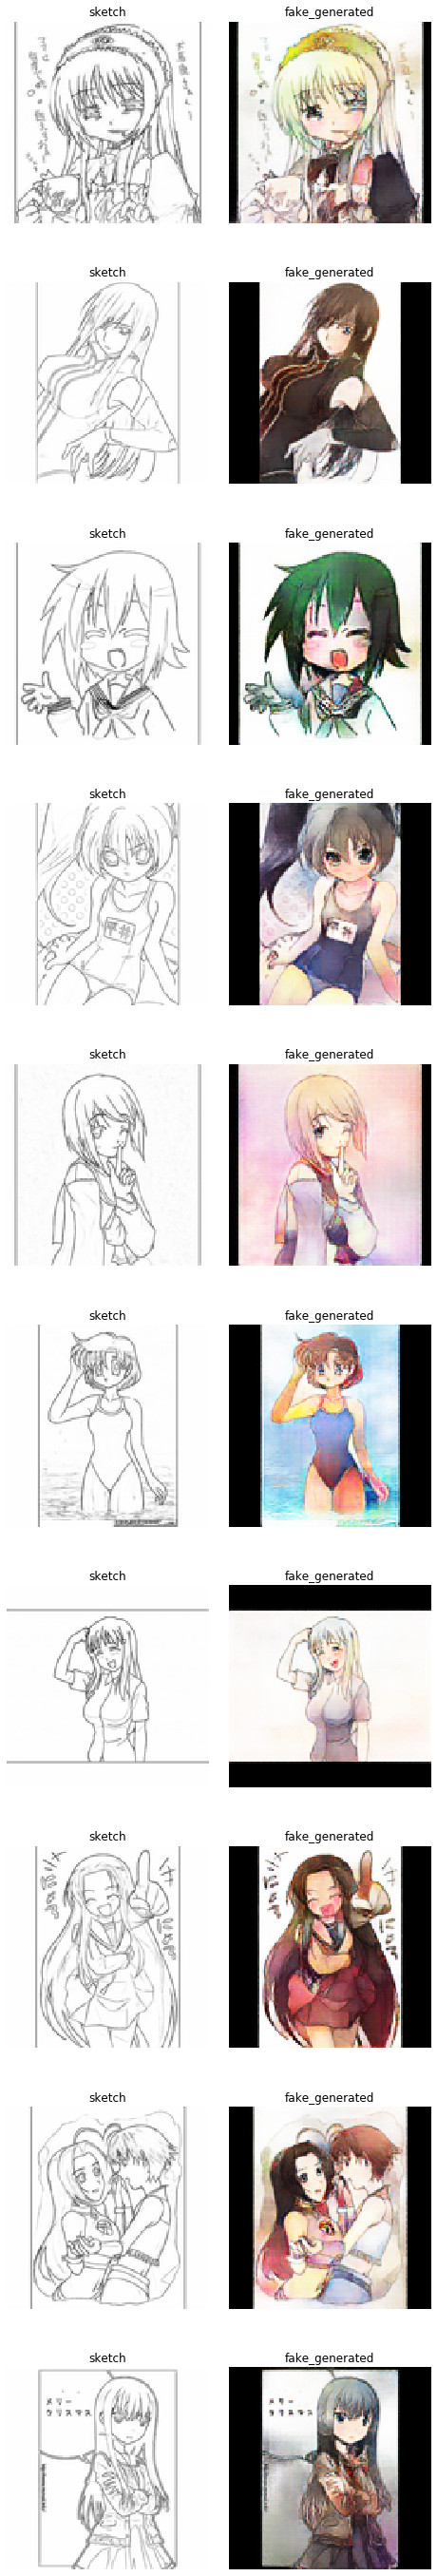

In [3]:
# our data points will be images, so specify the path of the image

def function_1(sketch_path):
    '''
    This function take the sketch_folder path and predict the fake color image
    with the help of best generator model
    '''

    test_img = []
    for img in os.listdir(sketch_path):        
        # reading images
        img = Image.open("{}/{}".format(sketch_path,img)).convert('RGB')
        
        # resizing image and appneding it to list
        test_img.append(np.array(img.resize((128,128), PIL.Image.NEAREST)))
    
    #Normalizing the values to be between [-1, 1].
    test_img = (np.array(test_img, dtype='float32')/127.5 - 1)
    #loading model
    generator = load_model("save_model/generator/generator_49.h5")
    test_result = generator.predict(test_img)
    
    plot_img(test_img,test_result,'generator_49')
        
# created a folder and put some random images from the test_data
# you can add .jpg, .gif, .png any type of file
# only keep image in this folder
sketch_path = "fun_1"
function_1(sketch_path)

## function 2

In [4]:
def pixel_accuracy(img_real, img_fake):
    '''
    Helper function of function_2
    compute the pixelwise_loss between real and fake image
    '''
    real_total = np.sum(img_real)
    
    loss = np.sum(np.absolute(img_real - img_fake))
    
    loss_per = np.round(100 - (loss/real_total)*100, 2)
    
    return loss_per

In [5]:
def plot_img2(sketch_img, real_img, fake_img, img_name):
    '''
    Helper function for function_2
    This function plot the sketch, real and fake color image with pixelwise loss and save the plot
    '''

    # Rescaling images to [0 - 1]
    sketch_img = 0.5 * sketch_img + 0.5
    real_img = 0.5 * real_img + 0.5
    fake_img = 0.5 * fake_img + 0.5
    
    fig, axs = plt.subplots(sketch_img.shape[0], 3, figsize=(.8 * sketch_img.shape[0],5 * sketch_img.shape[0]))
    axs = axs.flatten()
    cnt = 0
    for sketch, real, fake in zip(sketch_img, real_img, fake_img):
        axs[cnt].imshow(sketch)
        axs[cnt].set_title('sketch')
        axs[cnt].axis('off')
        
        axs[cnt+1].imshow(real)
        axs[cnt+1].set_title('real')
        axs[cnt+1].axis('off')
        
        axs[cnt+2].imshow(fake)
        axs[cnt+2].set_title('fake_generated \n Pixel_accuracy : {}'.format(pixel_accuracy(real,fake)))
        axs[cnt+2].axis('off')
        cnt += 3
    fig.savefig("fun_1_result/{}.png".format(img_name))
    plt.subplots_adjust(wspace=.1, hspace=.1)
    plt.show()

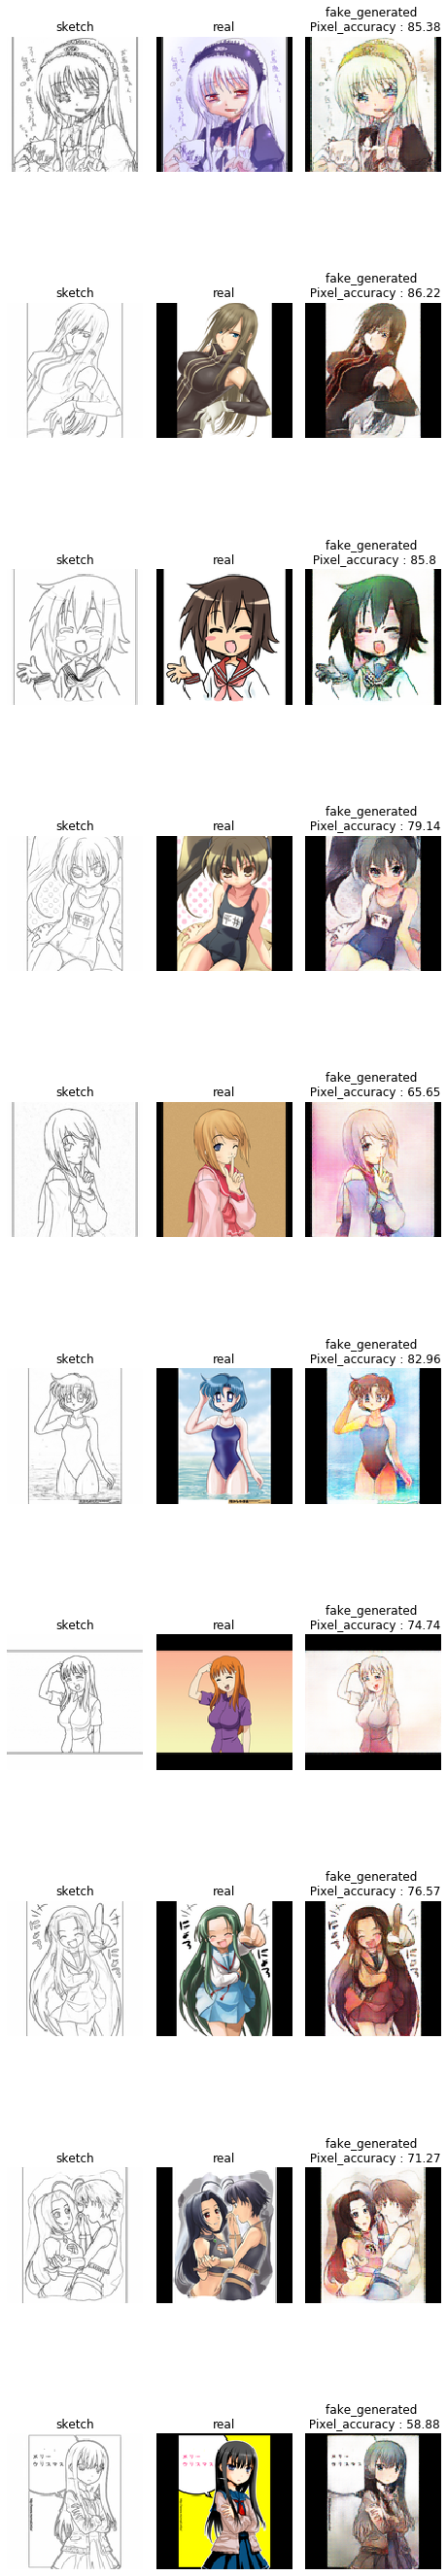

In [6]:
# our data points will be images, so specify the path of the image
def function_2(sketch_path,color_path):
    '''
    This function take the sketch_folder path, color folder path
    and predict the fake color image with the help of best generator model
    along with also compare the fake generated image with real image
    '''
    
    #assuming both sketch_img and color_img have same name belonging to different directory 

    test_sketch_img = []
    test_color_img = []
    
    sketch_name = os.listdir(sketch_path)
    color_name = os.listdir(color_path)
    
    for i in range(len(sketch_name)):
        sketch_name[i] = sketch_path + sketch_name[i]
        color_name[i] = color_path + color_name[i]
    
    for sketch, color in zip(sketch_name, color_name):

        # reading images
        skt_img = Image.open(sketch).convert('RGB')
        col_img = Image.open(color).convert('RGB')
        
        # resizing image and appneding it to list
        test_sketch_img.append(np.array(skt_img.resize((128,128), PIL.Image.NEAREST)))
        test_color_img.append(np.array(col_img.resize((128,128), PIL.Image.NEAREST)))
    
    #Normalizing the values to be between [-1, 1].
    test_sketch_img = np.array(test_sketch_img, dtype='float32')/127.5 - 1
    test_color_img = np.array(test_color_img, dtype='float32')/127.5 - 1
    
    
    #loading generator model
    generator = load_model("save_model/generator/generator_49.h5")
    
    fake_col_img = generator.predict(test_sketch_img)

    plot_img2(test_sketch_img, test_color_img, fake_col_img,'generator_49')

# path example:- "test_folder/images/"
sketch_img_path = "fun_2/sketch/"
color_img_path = "fun_2/color/"
function_2(sketch_img_path, color_img_path)